## Negative Binomial Experiment
n repeats trials <br>
independent trials <br>
outcome: success (s) or failure (s) <br>
P(s) is the same for every trials <br>
The experiment continues until x successes


## Negative Binomial Distribution
$\bar{b}(x,n,p) = \begin{pmatrix}n-1\\x-1 \end{pmatrix}\cdot p^X\cdot q^{(n-x)}$ 

$x$ - success <br>$n$ - trials <br>$p$ - probability of success<br>$q=1-p$ - probability of failure 

## Geometric Distibution
$X_i = \begin{cases}1 \textrm{ if the }i^{th} \textrm{is a success}
\\0 \textrm{ otherwise}\end{cases}$

$g(n,p) = q^{(n-1)}\cdot p$

In [1]:
m, d = list(map(int, input().split()))
n = int(input())
temp = 0

def geom_dist(n, p):
    return (1-p)**(n-1)*p

for i in range(1,n+1):
    temp = temp + geom_dist(i, m/d)

print(f"p(5th, .33) = {temp:.3f}")

p(5th, .33) = 1.000


## Covariance
$cov(X,Y) = \frac{1}{n}\sum\limits_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})$
## Pearson Correlation Coefficient
$\rho_{X,Y}=\frac{cov(X,Y)}{\sigma_X\sigma_Y}$

In [2]:
from typing import List
import math


def shift(X: List) -> List:
    X_mean = sum(X)/len(X)
    return list(map(lambda i: i-X_mean, X))
     
def std_dev(X: List) -> float:
    temp = list(map(lambda i: i**2, shift(X)))
    return math.sqrt(sum(temp)/len(temp))
      
def cov(X: List, Y:List) -> float:
    assert len(X)==len(Y), "Sets must be same length"
    temp = [i*j for i, j in zip(shift(X), shift(Y))]
        
    return 1/len(X)*sum(temp)

def pearson_coef(X: List, Y: List) -> float:
    return round((cov(X,Y))/(std_dev(X)*std_dev(Y)), 3)

In [ ]:
n = int(input("Type in n: "))
x = list(map(float, input("Type a list of float number [2.1 1.3 ...]").split()))
y = list(map(float, input("Type a list of float number [2.1 1.3 ...]").split()))

In [9]:
print(f"The Pearson Coefficient is: {pearson_coef(x, y)}")


The Pearson Coefficient is: -0.449


## Normal Distribution
$N(\mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

## Cumulative probability
$\Phi(x) = \frac{1}{2}(1+ERF(\frac{x-\mu}{\sigma\sqrt{2}}))$ <br><br>

Error Function: <br>
$ERF = \frac{2}{\sqrt{\pi}}\int_{0}^{z}e^{-x^2}\,dx$

In [11]:
import math

mu, sigma = list(map(float, input("Type in Mu and sigma: ").split()))
sigma = math.sqrt(sigma)

x1 = float(input("Type in first number: "))
x2, x3 = list(map(float, input("Type in second number: ").split()))

def cdf(x, mu, sigma):
    return .5*(1+math.erf((x-mu)/(sigma*math.sqrt(2))))

print(f'CDF: {cdf(x1, mu, sigma):.4f}')
print(f'CDF: {cdf(x3, mu, sigma)-cdf(x2, mu, sigma):.4f}')

CDF: 0.9991
CDF: -0.0884


In [13]:
mu, sigma = list(map(float, input().split())) # The mean and std of the grades

x2, x3 = list(map(int, input().split())) # The limits 

print(f'Higher than {x2}: {1-cdf(x2, mu, sigma):.2%}')
print(f'Higher than {x3}: {1-cdf(x3, mu, sigma):.2%}')
print(f'Lower than {x3}: {cdf(x3, mu, sigma):.2%}')

Higher than 1: 15.87%
Higher than 4: 0.00%
Lower than 4: 100.00%


## Central Limit Theorem
$s_n := \frac{\sum_iX_i}{N}\textrm{ with }S_n\textrm{ close to }N(\mu^i, \sigma^i)$ <br>
$\mu^i = n\cdot\mu$<br>$\sigma^i = \sqrt{n}\cdot\sigma$

In [14]:
import math

max_load = int(input("Max load: "))
n_box = int(input("Boxes: "))
mu = int(input("Mean: "))
sigma = int(input("Sigma: "))

mu1 = n_box*mu
sigma1 = math.sqrt(n_box)*sigma

print(f"Mean sample: {mu1}")
print(f"Std sample: {sigma1:.3f}")

print(f"{cdf(max_load, mu1, sigma1):.4f}")

Mean sample: 0
Std sample: 3.162
1.0000


## Linear Regression

$\hat{Y} = a + bX$ <br>
Finding b: <br>
$b = \rho\cdot\frac{\sigma_Y}{\sigma_X}$ <br>
where $\rho$ is the Pearson Correlation Coefficient <br>
Finding a: <br>
$a = \bar{y} - b\cdot\bar{x}$

In [17]:
from IPython.display import clear_output

def get_slope(x, y):
    return pearson_coef(x, y)*std_dev(y)/std_dev(x)

def get_intercept(x, y):
    return sum(y)/len(y) - get_slope(x, y)*sum(x)/len(x) 

def predict(x_, x, y):
    b = get_slope(x, y)
    a = get_intercept(x, y)
    return f"{a + b*x_:.3}"

n_students =int(input("Number of students: "))
maths, phy = [], []

for _ in range(n_students):
    print("Math scores:")
    maths.append(int(input("Maths score: ")))
    clear_output()
                 
for _ in range(n_students):
    print("Physics scores:")
    phy.append(int(input("Physics score: ")))
    clear_output()
            
if __name__=="__main__":
    print(f"Number of students: {n_students}")
    print(f"Math scores: {maths}")
    print(f"Physics scores: {phy}")
    x = int(input("X: "))
    print(f"Prediction for {x}: {predict(x, maths, phy)}")

Number of students: 5
Math scores: [12, 11, 7, 8, 6]
Physics scores: [2, 6, 7, 9, 4]
Prediction for 4: 7.64


<Axes: >

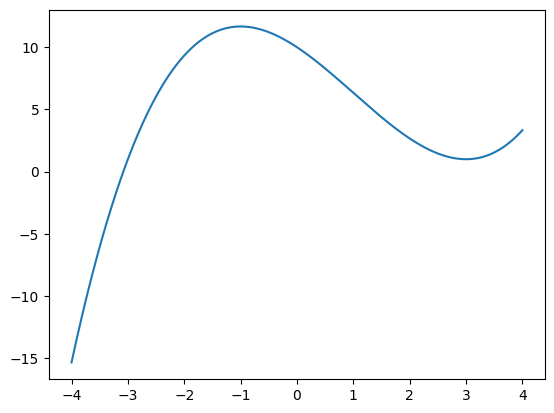

In [18]:
import numpy as np
import seaborn as sb

def func(x):
    return 1/3*x**3-x**2-3*x+10

x = np.linspace(-4, 4, num=1000)
y = [func(i) for i in x]

sb.lineplot(x=x, y=y)

In [ ]:
a = np.array([[1,4,1],[2,5,2],[3,6,1]])
g = np.array([2,1,3])

In [ ]:
B = np.array([[2,1,0],[1,4,4],[5,6,4]])
print(np.linalg.matrix_rank(B))

A = np.array([[1,-1,2],[0,3,-4]])
B = np.array([[-1,0,0],[2,0,1],[0,1,3]])
print(np.matmul(A, B))

C = np.array([[1,4,1],[2,5,2],[3,6,1]])
print(np.matmul(A, np.matmul(B, C)))

u = np.array([1, 3])
v = np.array([-1, 1])
print(np.inner(u, v))

2
[[-3  2  5]
 [ 6 -4 -9]]
[[ 16  28   6]
 [-29 -50 -11]]
2


In [19]:
A = np.array([[1,2,3],[4,5,6],[1,2,1]])
A_inv = np.linalg.inv(A)

print(f"A: \n{A}\n")
print(f"A': \n{np.matrix.round(A_inv, decimals=3)}\n")
print(f"A*A': \n{np.matrix.round(np.matmul(A, A_inv), decimals=3)}\n")

A: 
[[1 2 3]
 [4 5 6]
 [1 2 1]]

A': 
[[-1.167  0.667 -0.5  ]
 [ 0.333 -0.333  1.   ]
 [ 0.5   -0.    -0.5  ]]

A*A': 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]



In [42]:
np.outer(A, A_inv)

array([[-0.44982085,  0.25704049, -0.19278037,  0.12852024, -0.12852024,
         0.38556073,  0.19278037, -0.        , -0.19278037],
       [-0.07788621,  0.04450641, -0.03337981,  0.0222532 , -0.0222532 ,
         0.06675961,  0.03337981, -0.        , -0.03337981],
       [-1.11152313,  0.63515607, -0.47636705,  0.31757804, -0.31757804,
         0.95273411,  0.47636705, -0.        , -0.47636705],
       [-0.87521971,  0.50012555, -0.37509416,  0.25006278, -0.25006278,
         0.75018833,  0.37509416, -0.        , -0.37509416],
       [-0.89356706,  0.51060975, -0.38295731,  0.25530488, -0.25530488,
         0.76591463,  0.38295731, -0.        , -0.38295731],
       [-0.9140769 ,  0.52232966, -0.39174724,  0.26116483, -0.26116483,
         0.78349449,  0.39174724, -0.        , -0.39174724],
       [-0.18502828,  0.10573044, -0.07929783,  0.05286522, -0.05286522,
         0.15859567,  0.07929783, -0.        , -0.07929783],
       [-0.43513304,  0.24864745, -0.18648559,  0.12432373, -0

In [21]:
A = np.array([[0,0],[0,0]])
np.linalg.matrix_rank(A)

np.int64(0)

In [22]:
C = np.array([[1,1,1],[1,0,1],[0,1,0]])
np.linalg.matrix_rank(C)

np.int64(2)

In [23]:
A = np.array([[1,2],[2,1]])
np.linalg.matrix_rank(A)

np.int64(2)

In [24]:
D = np.array([[1,1,0],[0,1,1],[0,0,1]])
np.linalg.matrix_rank(D)

np.int64(3)

In [25]:
C = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
np.linalg.matrix_rank(C)

np.int64(2)

In [26]:
C = np.array([[1,2,3],[4,5,6],[1,2,1]])
np.linalg.det(np.transpose(C))

np.float64(6.0)

In [27]:
C

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 1]])

In [28]:
np.transpose(C)

array([[1, 4, 1],
       [2, 5, 2],
       [3, 6, 1]])

In [29]:
A = np.array([[3,0],[.5,2]])
v = np.array([2, 1])
w = np.array([0, 1])

In [30]:
e_val, e_vec = np.linalg.eig(A)
e_val

array([2., 3.])

In [31]:
np.linalg.det(A)

np.float64(6.0)

In [32]:
np.matmul(A, v)/v

array([3., 3.])

In [33]:
np.matmul(np.matmul(A, v), np.transpose(v))

np.float64(15.0)

In [34]:
np.trace(A)

np.float64(5.0)

In [35]:
def randomization(n):
    """
    Arg:
      n - an integer
    Returns:
      A - a randomly-generated nx1 Numpy array.
    """
    return np.random.random([n, 1])
    raise NotImplementedError

if __name__=="__main__":
    n = int(input("Type n: "))
    print(randomization(n))

[[0.14838367]
 [0.7071676 ]
 [0.70647992]
 [0.46689007]
 [0.16881676]
 [0.00521113]
 [0.22426549]
 [0.38810965]
 [0.33271183]
 [0.01015878]]


In [36]:
def operations(h, w):
    """
    Takes two inputs, h and w, and makes two Numpy arrays A and B of size
    h x w, and returns A, B, and s, the sum of A and B.

    Arg:
      h - an integer describing the height of A and B
      w - an integer describing the width of A and B
    Returns (in this order):
      A - a randomly-generated h x w Numpy array.
      B - a randomly-generated h x w Numpy array.
      s - the sum of A and B.
    """
    A = np.random.random([h,w])
    B= np.random.random([h,w])
    s = A+B
    
    return A, B, s
    raise NotImplementedError
    
if __name__=="__main__":
    h, w = list(map(int, input().split()))
    print(f"A: \n{operations(h, w)[0]}\n")
    print(f"B: \n{operations(h, w)[1]}\n")
    print(f"s: \n{operations(h, w)[2]}\n")

A: 
[[0.8669051  0.13879276 0.89599998 0.78731536 0.56767852 0.3808379
  0.51634169 0.72855693]
 [0.43506939 0.29123161 0.21213676 0.8450159  0.85622079 0.67847531
  0.10562888 0.36198702]
 [0.37904523 0.45714068 0.97241788 0.29925761 0.62626275 0.08194552
  0.47850783 0.09935386]
 [0.58839853 0.15033263 0.66541309 0.09380191 0.75237114 0.47224379
  0.48797029 0.73234364]]

B: 
[[0.98998935 0.55907467 0.15473653 0.81482074 0.85164233 0.94760203
  0.60819907 0.59569635]
 [0.72948365 0.23778977 0.36220423 0.3158103  0.49718542 0.19191623
  0.54745626 0.83556892]
 [0.19397355 0.76035884 0.1606172  0.08836491 0.7748574  0.63197418
  0.76356341 0.27105794]
 [0.54713493 0.24056994 0.508468   0.82992098 0.42324476 0.44718842
  0.0637604  0.37512532]]

s: 
[[0.85912    0.6411242  1.71500199 0.97445859 1.13462306 0.2788425
  0.43992846 0.91054154]
 [0.61870962 1.47418529 0.98484314 1.22594373 0.52722126 1.02791848
  0.87980767 1.17283281]
 [0.96435486 0.83603324 1.43774503 1.53311983 1.10356395

In [37]:
def norm(A, B):
    """
    Takes two Numpy column arrays, A and B, and returns the L2 norm of their
    sum.

    Arg:
      A - a Numpy array
      B - a Numpy array
    Returns:
      s - the L2 norm of A+B.
    """
    s = A+B
    return f"{np.linalg.norm(s):.4f}"

    raise NotImplementedError
    
if __name__=="__main__":
    n = int(input("Type n: "))
    A = randomization(n)
    B = randomization(n)
    
    print(norm(A, B))
    

3.8057


In [38]:
def neural_network(inputs, weights):
    """
     Takes an input vector and runs it through a 1-layer neural network
     with a given weight matrix and returns the output.

     Arg:
       inputs - 2 x 1 NumPy array
       weights - 2 x 1 NumPy array
     Returns (in this order):
       out - a 1 x 1 NumPy array, representing the output of the neural network
    """
    
    return np.array([np.tanh(sum(weights*inputs))])
    raise NotImplementedError
    
if __name__=="__main__":
    inputs = np.array([[0.91509673], [0.49696427]])
    weights = np.array([[0.9881837], [0.04396035]])
    print(neural_network(inputs, weights))

[[0.72878465]]


In [39]:
neural_network(inputs, weights).shape

(1, 1)

In [40]:
def scalar_function(x, y):
    """
    Returns the f(x,y) defined in the problem statement.
    """
    if x<=y:
        return x*y
    else:
        return x/y
        
    raise NotImplementedError

In [41]:
def vector_function(x, y):
    """
    Make sure vector_function can deal with vector input x,y 
    """
    vfunc = np.vectorize(scalar_function)
    
    return vfunc(x, y)

    raise NotImplementedError